In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv('bikeshare.csv')
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
count = data['count'].values
temp = data['temp'].values

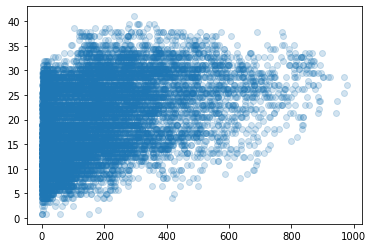

In [8]:
plt.scatter(count, temp, alpha = 0.2)

In [50]:
dt = data['datetime'].values

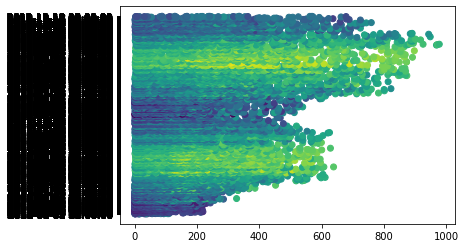

In [18]:
plt.scatter(count, dt, c=temp)

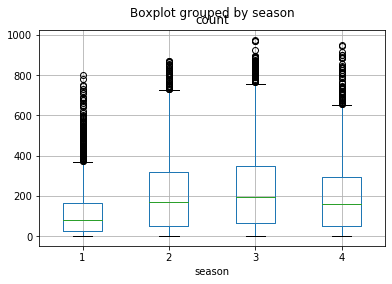

In [43]:
data.boxplot(column = 'count', by = 'season')

In [64]:
# 2012-12-19 19:00:00
hour = []
for datetime_piece in dt:
    hour.append(datetime.strptime(datetime_piece, '%Y-%m-%d %H:%M:%S').hour)

In [69]:
data.insert(1, "hour", hour, True)
data.head()

,datetime,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


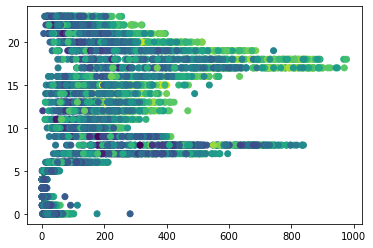

In [81]:
plt.scatter(data['count'].where(data['workingday'] == 1), data['hour'], c=temp)

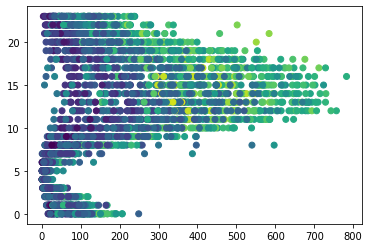

In [82]:
plt.scatter(data['count'].where(data['workingday'] != 1), data['hour'], c=temp)

In [85]:
def linear_regression(X, y):
    theta1 = 0
    theta0 = 0
    alpha = 0.0001
    epochs = 15000
    m = len(y)

    for i in range(epochs):
        h = theta1 * X + theta0
        d_theta1 = (-2 / m) * sum(X * (y -  h))
        d_theta0 = (-2 / m) * sum(y - h)
        theta1 = theta1 - alpha * d_theta1
        theta0 = theta0 - alpha * d_theta0
    
    return theta0, theta1

In [5]:
X = data['temp'].values
# X = (X - X.mean()) / X.std()
y = data['count'].values

In [101]:
theta0, theta1 = linear_regression(X, y)

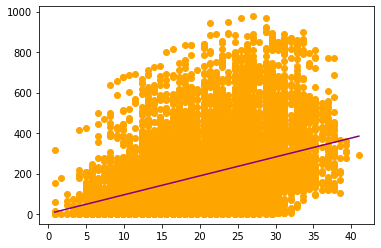

In [102]:
h = theta1 * X + theta0 
plt.scatter(X, y, c = 'orange')
plt.plot([min(X), max(X)], [min(h), max(h)], c='purple')

In [103]:
predict_25 = theta1 * 25.0 + theta0
int(predict_25)

235

In [154]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour']

In [105]:
data_features = data[features]
data_features.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,hour
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [140]:
def linear_regression_multiple(X, y, alpha, epochs):
    features = X.shape[1]
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    theta = np.zeros(features + 1)
    h = hypothesis(theta, X, features)
    theta, loss = gradient_descent(theta, alpha, epochs, h, X, y, features)
    return theta, loss

In [107]:
def gradient_descent(theta, alpha, epochs, h, X, y, features):
    loss = np.ones(epochs)
    for i in range(epochs):
        theta[0] = theta[0] - (alpha / X.shape[0]) * sum(h - y)
        for j in range(1, features + 1):
            theta[j] = theta[j] - (alpha / X.shape[0]) * sum((h - y) * X.transpose()[j])
        h = hypothesis(theta, X, features)
        loss[i] = (1 / (2 * X.shape[0])) * sum(np.square(h - y))
    theta = theta.reshape(1, features + 1)
    return theta, loss

In [110]:
def hypothesis(theta, X, features):
    h = np.ones((X.shape[0], 1))
    theta = theta.reshape(1, features + 1)
    for i in range(X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [141]:
theta, loss = linear_regression_multiple(data_features.values, y, 0.0001, 1000)

In [126]:
print ('Theta : {}\nLoss : {}'.format(theta, loss[-1]))

Theta : [[ 3.84598259e-01  2.98221029e+00 -6.53969020e-03  2.46073854e-01
  -4.44112115e-02  8.48239541e+00 -1.52654232e+00  6.97606174e-01
   8.27127279e+00]]
Loss : 11187.264306784551


In [127]:
n_iterations = [x for x in range(1000)]

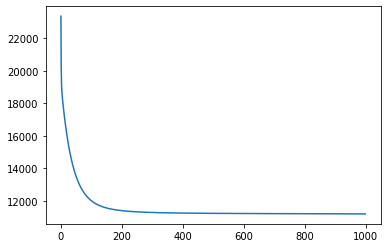

In [128]:
plt.plot(n_iterations, loss)

In [155]:
features_split = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'count']
past = data[features_split][:8800]
past.tail()

,season,holiday,workingday,weather,temp,humidity,windspeed,hour,count
8795,3,0,1,1,30.34,66,12.9980,20,500
8796,3,0,1,1,30.34,66,7.0015,21,381
8797,3,0,1,1,29.52,74,7.0015,22,233
8798,3,0,1,1,29.52,70,8.9981,23,136
8799,3,0,1,1,29.52,74,12.9980,0,67


In [156]:
features_split = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'count']
future = data[features_split][8800:]
future.tail()

,season,holiday,workingday,weather,temp,humidity,windspeed,hour,count
10881,4,0,1,1,15.58,50,26.0027,19,336
10882,4,0,1,1,14.76,57,15.0013,20,241
10883,4,0,1,1,13.94,61,15.0013,21,168
10884,4,0,1,1,13.94,61,6.0032,22,129
10885,4,0,1,1,13.12,66,8.9981,23,88


In [157]:
X_train = past.drop('count', axis = 1)
y_train = past['count'].values

In [166]:
X_test = future.drop('count', axis = 1)
y_test = future['count'].values

In [159]:
theta, loss = linear_regression_multiple(X_train.values, y_train, 0.0001, 1000)

In [179]:
counter = 0
mse = 0

for index, row in X_test.iterrows():
    predicted = (row.values * theta[0, 1:])[0]
    mse += (y - predicted) ** 2
    counter += 1
    
mse = np.mean(mse)

In [180]:
print ('Mean square error :\n{}'.format(mse))

Mean square error :
142597226.36331835
